In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
def getbJetTrack(mu = 0, sig = 0.5, decay=3, fracDecay=0.05, fracFlat=0.05):
    r = numpy.random.rand()
    if (r < fracDecay):
        return numpy.random.exponential(decay)+numpy.random.normal(0,0.25)
    elif (r < (fracDecay+fracFlat)):
        return 6 * numpy.random.random_sample()-3 #get flat -3 to 2
    else:
        return numpy.random.normal(mu,sig)        

In [123]:
def getLFTrack(mu = 0, sig = 0.5, fracFlat=0.05):
    r = numpy.random.rand()
    if( r < fracFlat):
        return 6 * numpy.random.random_sample()-3
    else:        
        return numpy.random.normal(mu,sig)


In [124]:
def getbJetData(NumData, fracDecay=0.05): #get list of NumData number of elements
    DataSet=[]
    for i in range (NumData):
        n = numpy.random.poisson(4)
        tracks=[]
        for j in range (n):
            tracks.append(getbJetTrack(fracDecay=fracDecay))
        DataSet.append(np.array(tracks))
    return np.array(DataSet)

In [125]:
def getLFJetData(NumData): # get list of NumData number of elements
    DataSet=[]
    for i in range (NumData):
        n = numpy.random.poisson(2)
        tracks=[]
        for j in range (n):
            tracks.append(getLFTrack())
        DataSet.append(tracks)
    return DataSet

In [126]:
def DataSameLen(listOfLists): # add 0 to the end of stort list elements
    maxLen=0
    for i in listOfLists:
        if len(i)>maxLen:
            maxLen=len(i)
    for i in listOfLists:
        if len(i)<maxLen:
            while(len(i)<maxLen):
                i.append(0)
    return listOfLists


In [127]:
def getData(NumData): #combines B jet data and LF jet data, NumData: number of data in each, adds indicator at the front
    bj=getbJetData(NumData) #only train uses this
    j=0
    for i in bj:
        bj[j] = [True] + i
        j+=1
    lfj=getLFJetData(NumData)
    k=0
    for i in lfj:
        lfj[k] = [False] + i
        k+=1
    for j in lfj:
        bj.append(j)
    return DataSameLen(bj)

In [128]:
def dist(elem_train, elem_test): 
    d=0.0
    for i in range(1, len(elem_train)):
        d+=(elem_train[i]-elem_test[i-1])**2
    return numpy.sqrt(d)

def getNbors(train, elem_test, k):
    distance=[]
    for elem in train:
        distance.append([elem,dist(elem,elem_test)])
    distance.sort(key = lambda ls : ls[1])
    nbors=[]
    for i in range(k):
        nbors.append(distance[i][0])
    return nbors

def BjetProb(train, elem_test, k):
    neigbors=getNbors(train,elem_test,k)
    numTrue=0
    for i in neigbors:
        if (i[0]==True):
            numTrue+=1
    return float(numTrue)/float(len(neigbors))

# Plot the Data

In [132]:
def flatten(inData):
    dataFlat = np.array([])
    for jet in inData:
        dataFlat = np.append(dataFlat,jet)
    return dataFlat

In [133]:
nEvents = 10000

bj=getbJetData(nEvents, fracDecay=0.2) #only train uses this
bjFlat = flatten(bj)

lf=getLFJetData(nEvents)
lfFlat = flatten(lf)

print(f"{len(bjFlat)} vs {len(lfFlat)}")

<ipython-input-124-f66e66142e37>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(DataSet)


39885 vs 20026


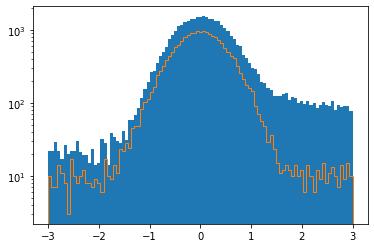

In [134]:
bins = np.linspace(-3,3,100)
plt.hist(bjFlat,bins=bins)
plt.hist(lfFlat,bins=bins,histtype="step")

plt.yscale("log")
plt.show()

In [40]:
train = getData(1000)
test = []
test=getbJetData(1000)
xs=getLFJetData(1000)
for i in range (1000):
    test.append(xs[i])
DataSameLen(test)
DataSameLen(train)
#print("lenTest:",len(test[0]))
#print(test)
#print("lenTrain:",len(train[0]))
#print(train)
if (len(test[0])<len(train[0])-1):
    for i in test:
        while(len(i)<len(train[0])-1):
            i.append(0)
#print(test)
prob=[]
for i in test:
    prob.append(BjetProb(train,i,10))
prob
plt.hist(prob, density=True, bins=50)

<ipython-input-33-9f0536908947>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(DataSet)


AttributeError: 'numpy.ndarray' object has no attribute 'append'